In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_1 = pd.read_csv('/content/drive/MyDrive/dengue_features_train.csv', usecols = ['city', 'year', 'weekofyear', 'week_start_date', 'precipitation_amt_mm'])
df_2 = pd.read_csv('/content/drive/MyDrive/dengue_labels_train.csv')

In [ ]:
df_1

,city,year,weekofyear,week_start_date,precipitation_amt_mm
0,sj,1990,18,1990-04-30,12.42
1,sj,1990,19,1990-05-07,22.82
2,sj,1990,20,1990-05-14,34.54
3,sj,1990,21,1990-05-21,15.36
4,sj,1990,22,1990-05-28,7.52
...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,55.30
1452,iq,2010,22,2010-06-04,86.47
1453,iq,2010,23,2010-06-11,58.94
1454,iq,2010,24,2010-06-18,59.67


In [ ]:
df_2

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [ ]:
df = df_1.merge(df_2, on= ['city', 'year', 'weekofyear'], how = 'inner')
df

,city,year,weekofyear,week_start_date,precipitation_amt_mm,total_cases
0,sj,1990,18,1990-04-30,12.42,4
1,sj,1990,19,1990-05-07,22.82,5
2,sj,1990,20,1990-05-14,34.54,4
3,sj,1990,21,1990-05-21,15.36,3
4,sj,1990,22,1990-05-28,7.52,6
...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,55.30,5
1452,iq,2010,22,2010-06-04,86.47,8
1453,iq,2010,23,2010-06-11,58.94,1
1454,iq,2010,24,2010-06-18,59.67,1


In [ ]:
df['total_cases'].describe(percentiles = [0.1, 0.25, 0.3, 0.4, 0.5, 0.6, 0.75, 0.8, 0.9, 0.95])

count    1456.000000
mean       24.675137
std        43.596000
min         0.000000
10%         1.000000
25%         5.000000
30%         6.000000
40%         8.000000
50%        12.000000
60%        17.000000
75%        28.000000
80%        33.000000
90%        56.000000
95%        81.250000
max       461.000000
Name: total_cases, dtype: float64

In [ ]:
nan_columns = df.columns[df.isna().any()]
df[nan_columns].isna().sum()

precipitation_amt_mm    13
dtype: int64

In [ ]:
df.dropna(subset = ['precipitation_amt_mm'], inplace = True)
nan_columns = df.columns[df.isna().any()]
df[nan_columns].isna().sum()

Series([], dtype: float64)

In [ ]:
def asignar_precipitacion(total_precipitacion):
  if ( 0 < total_precipitacion <= 20):
    return '0mm - 20mm'
  elif ( 20 < total_precipitacion <= 40):
    return '20mm - 40mm'
  elif ( 40 < total_precipitacion <= 60):
    return '40mm - 60mm'
  elif ( 60 < total_precipitacion <= 80):
    return '60mm - 80mm'
  elif ( 80 < total_precipitacion <= 100):
    return '80mm - 100mm'
  elif ( 100 < total_precipitacion <= 200):
    return '100mm - 200mm'
  elif ( 200 < total_precipitacion):
    return '> 200mm'

df['precip'] = df['precipitation_amt_mm'].map(lambda x: asignar_precipitacion(x))
df_precip = df[['precip', 'total_cases']]
df_precip

,precip,total_cases
0,0mm - 20mm,4
1,20mm - 40mm,5
2,20mm - 40mm,4
3,0mm - 20mm,3
4,0mm - 20mm,6
...,...,...
1451,40mm - 60mm,5
1452,80mm - 100mm,8
1453,40mm - 60mm,1
1454,40mm - 60mm,1


In [ ]:
plt.figure(dpi=130)
sns.violinplot(data=df_precip, x='precip', y='total_cases', palette=['#CBD9D9', '#D9D9D9', '#BFBFBF', '#99A3A3', '#848C8C', '#717878', '#5F5D63'], cut=0)
plt.ylim(0,120)
plt.title("Distribución de los casos de dengue en funcion de la precipitación por día")
plt.xticks(rotation=90)
plt.xlabel("Precipitaciones")
plt.ylabel("Casos de dengue")

NameError: ignored

Text(0, 0.5, 'Casos de dengue')

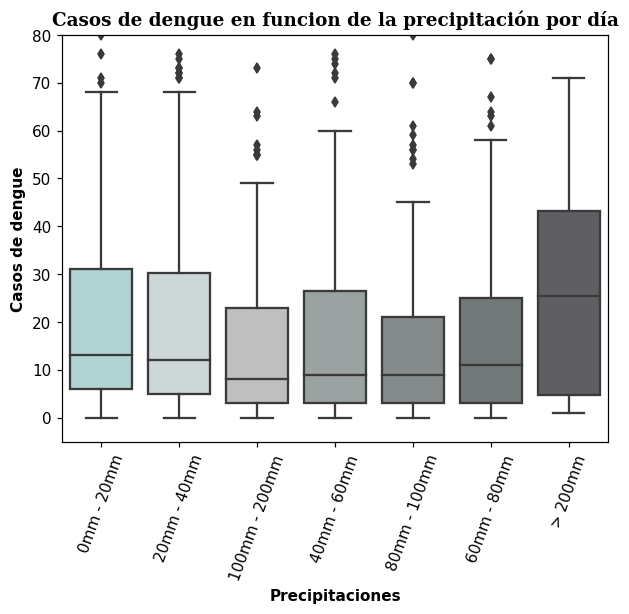

In [ ]:
plt.figure(dpi=110)
sns.boxplot(data=df_precip, x='precip', y='total_cases', palette=['#ABD9D9', '#CBD9D9', '#BFBFBF', '#99A3A3', '#848C8C', '#717878', '#5F5D63'])
plt.ylim(-5, 80)
plt.title("Casos de dengue en funcion de la precipitación por día", fontfamily='serif', fontsize=12, fontweight="bold")
plt.xticks(rotation=70)
plt.xlabel("Precipitaciones", fontweight="bold")
plt.ylabel("Casos de dengue", fontweight="bold")

In [ ]:
df['month'] = df['week_start_date'].map(lambda x: x[5:7])
df['month'] = df['month'].replace({'01': 'Enero', '02': 'Febrero',
       '03': 'Marzo', '04': 'Abril', '05': 'Mayo', '06': 'Junio', '07': 'Julio', '08': 'Agosto', '09': 'Septiembre', '10': 'Octubre', '11': 'Noviembre', '12': 'Diciembre'})
df['month'].unique()

array(['Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre',
       'Octubre', 'Noviembre', 'Diciembre', 'Enero', 'Febrero', 'Marzo'],
      dtype=object)

In [ ]:
df_anio_mes = df.groupby(['year', 'month']).agg({'total_cases': 'sum'}).unstack(0).droplevel(0, axis=1)
meses_order = ['Diciembre', 'Noviembre', 'Octubre',  'Septiembre', 'Agosto', 'Julio', 'Junio', 'Mayo', 'Abril', 'Marzo', 'Febrero', 'Enero']
df_anio_mes = df_anio_mes.loc[meses_order]
df_anio_mes

year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
month,,,,,,,,,,,,,,,,,,,,,
Diciembre,152.0,397.0,180.0,139.0,770.0,91.0,99.0,250.0,297.0,98.0,...,114.0,122.0,107.0,282.0,90.0,57.0,143.0,28.0,9.0,NaN
Noviembre,224.0,565.0,185.0,145.0,1486.0,123.0,119.0,214.0,291.0,156.0,...,267.0,112.0,149.0,154.0,168.0,103.0,165.0,80.0,22.0,NaN
Octubre,212.0,667.0,247.0,149.0,1996.0,176.0,122.0,323.0,434.0,239.0,...,318.0,157.0,190.0,121.0,295.0,95.0,564.0,191.0,8.0,NaN
Septiembre,111.0,313.0,337.0,98.0,955.0,132.0,117.0,154.0,414.0,185.0,...,225.0,86.0,131.0,131.0,462.0,99.0,410.0,115.0,6.0,NaN
Agosto,85.0,264.0,174.0,77.0,360.0,77.0,73.0,69.0,1016.0,134.0,...,141.0,49.0,109.0,78.0,424.0,70.0,328.0,17.0,22.0,NaN
Julio,39.0,93.0,152.0,93.0,275.0,64.0,46.0,36.0,852.0,89.0,...,80.0,48.0,102.0,100.0,253.0,52.0,206.0,12.0,6.0,NaN
Junio,21.0,72.0,94.0,65.0,134.0,41.0,18.0,41.0,283.0,45.0,...,58.0,35.0,62.0,76.0,86.0,31.0,108.0,2.0,13.0,14.0
Mayo,18.0,54.0,98.0,55.0,90.0,16.0,17.0,27.0,173.0,53.0,...,36.0,65.0,32.0,51.0,44.0,52.0,80.0,4.0,7.0,20.0
Abril,4.0,87.0,135.0,39.0,85.0,43.0,38.0,59.0,154.0,72.0,...,36.0,79.0,23.0,51.0,65.0,61.0,61.0,26.0,28.0,31.0


In [ ]:
df_anio_mes.drop([1990,2010], axis = 1)

year,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
month,,,,,,,,,,,,,,,,,,,
Diciembre,397.0,180.0,139.0,770.0,91.0,99.0,250.0,297.0,98.0,92.0,114.0,122.0,107.0,282.0,90.0,57.0,143.0,28.0,9.0
Noviembre,565.0,185.0,145.0,1486.0,123.0,119.0,214.0,291.0,156.0,116.0,267.0,112.0,149.0,154.0,168.0,103.0,165.0,80.0,22.0
Octubre,667.0,247.0,149.0,1996.0,176.0,122.0,323.0,434.0,239.0,60.0,318.0,157.0,190.0,121.0,295.0,95.0,564.0,191.0,8.0
Septiembre,313.0,337.0,98.0,955.0,132.0,117.0,154.0,414.0,185.0,33.0,225.0,86.0,131.0,131.0,462.0,99.0,410.0,115.0,6.0
Agosto,264.0,174.0,77.0,360.0,77.0,73.0,69.0,1016.0,134.0,18.0,141.0,49.0,109.0,78.0,424.0,70.0,328.0,17.0,22.0
Julio,93.0,152.0,93.0,275.0,64.0,46.0,36.0,852.0,89.0,17.0,80.0,48.0,102.0,100.0,253.0,52.0,206.0,12.0,6.0
Junio,72.0,94.0,65.0,134.0,41.0,18.0,41.0,283.0,45.0,11.0,58.0,35.0,62.0,76.0,86.0,31.0,108.0,2.0,13.0
Mayo,54.0,98.0,55.0,90.0,16.0,17.0,27.0,173.0,53.0,4.0,36.0,65.0,32.0,51.0,44.0,52.0,80.0,4.0,7.0
Abril,87.0,135.0,39.0,85.0,43.0,38.0,59.0,154.0,72.0,10.0,36.0,79.0,23.0,51.0,65.0,61.0,61.0,26.0,28.0


In [ ]:
plt.figure(dpi=130)

cmap = sns.color_palette("coolwarm", 10, as_cmap = True)
cmap.set_over('#A52B26')

plt.title("Casos de dengue por mes y año", fontfamily='serif', fontsize=15, fontweight="bold")
sns.heatmap(df_anio_mes.drop([1990, 2010], axis = 1), square=True,
            cmap=cmap, vmax=450, cbar_kws={"extend": "max"}, linewidth= .5)

plt.xlabel("Año", fontweight="bold", fontsize = 12)
plt.ylabel("Mes", fontweight="bold", fontsize = 12)

NameError: ignored

In [ ]:
df_hist = df[df['total_cases'] > 10]
df_hist

,city,year,weekofyear,week_start_date,precipitation_amt_mm,total_cases,precip,month
13,sj,1990,31,1990-07-30,32.66,17,20mm - 40mm,Julio
14,sj,1990,32,1990-08-06,28.80,23,20mm - 40mm,Agosto
15,sj,1990,33,1990-08-13,90.75,13,80mm - 100mm,Agosto
16,sj,1990,34,1990-08-20,32.40,21,20mm - 40mm,Agosto
17,sj,1990,35,1990-08-27,40.94,28,40mm - 60mm,Agosto
...,...,...,...,...,...,...,...,...
1437,iq,2010,7,2010-02-19,32.19,19,20mm - 40mm,Febrero
1438,iq,2010,8,2010-02-26,84.67,15,80mm - 100mm,Febrero
1439,iq,2010,9,2010-03-05,80.58,12,80mm - 100mm,Marzo
1440,iq,2010,10,2010-03-12,57.78,12,40mm - 60mm,Marzo


Text(0.5, 0, 'Semana')

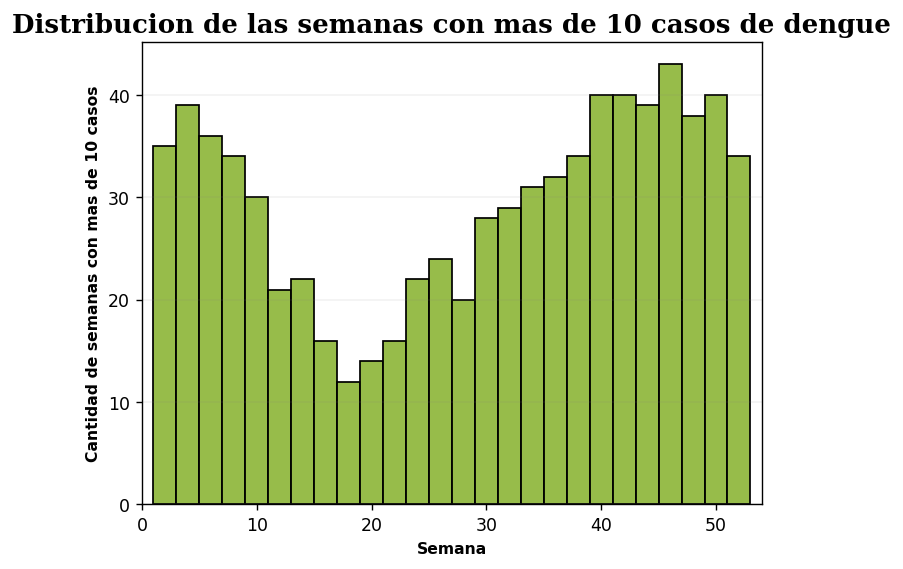

In [ ]:
plt.figure(dpi=125)
sns.histplot(data=df_hist,x='weekofyear', color = '#75A60D', binwidth=2).grid(color='grey', linestyle='-', linewidth=0.1, axis='y')
plt.title("Distribucion de las semanas con mas de 10 casos de dengue", fontfamily='serif', fontsize=15, fontweight="bold")
plt.xlim((0,54))
plt.ylabel("Cantidad de semanas con mas de 10 casos", fontweight="bold", fontsize = 9)
plt.xlabel("Semana", fontweight="bold", fontsize = 9)